# Heart attack prediction

## Exploratory Data Analysis

We start with exploratory data analysis to understand the data that we are working with, but first we will need to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's import the dataset and see the columns and their data types

In [2]:
heart = pd.read_csv("Data/heart.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We can see that we have 303 entries and they are all non-null, so we have no missing data.

Let's check for duplicates and drop them.

In [3]:
heart = heart.drop_duplicates()
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


There was just one duplicate, and we have dropped it.

We can now start with data visualisation and we will figure out if data needs more cleaning or pre-processing like normalisation.

### Data Visualisation

Let's plot one by one every column to see if we can find some interesting correlation between a column and the probability of having an heart attack.

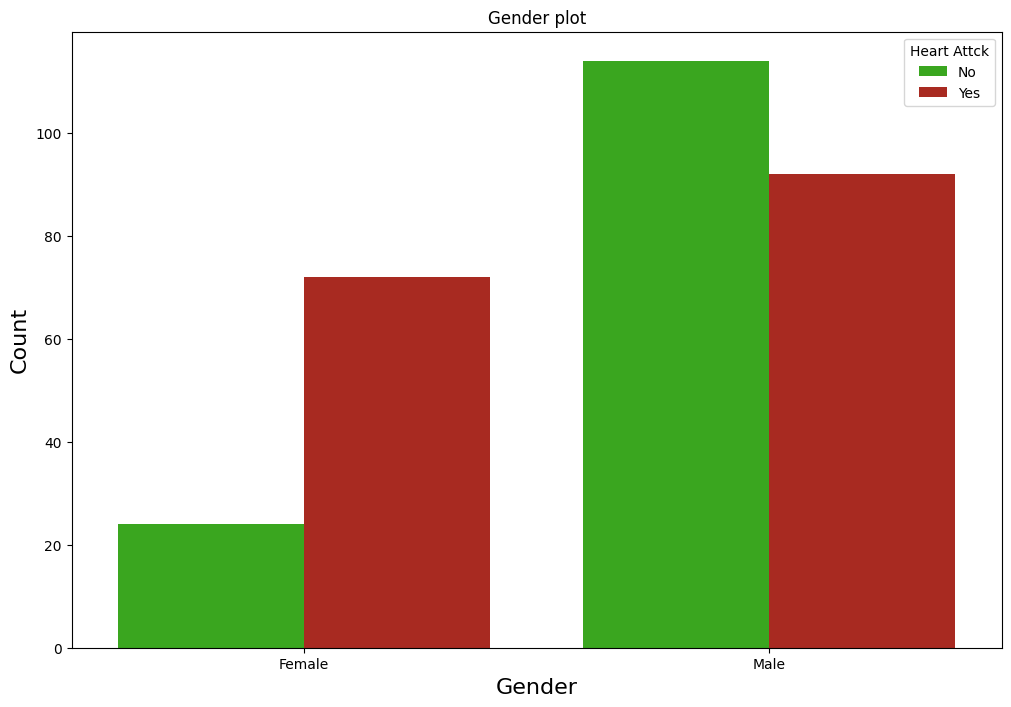

In [4]:
plt.figure(figsize=(12,8))
gender = sns.countplot(data = heart, x="sex",hue="output",palette=sns.color_palette(['#2cbd08', '#bf160a']))
gender.set(xticklabels=["Female", "Male"])
plt.legend(title='Heart Attck', loc='upper right', labels=['No', 'Yes'])
plt.title("Gender plot")
plt.xlabel("Gender",size=16)
plt.ylabel("Count",size=16)
plt.savefig("Pictures/DataVisualisation/Gender_plot.png")

The figure above could be misleading, because someone could think that male have higher probability to get an hearth attack respect to female.

However if we look at the proportions we have:

In [5]:
# 0 is for female and 1 is for male
female = heart.loc[heart.sex == 0]
male = heart.loc[heart.sex == 1]

# in position 0 we have how many DO NOT HAVE an heart attack, in position 1 the ones that HAVE an heart attack
female_heart = female.groupby(["output"])["output"].count()
male_heart = male.groupby(["output"])["output"].count()

In [6]:
print("Females:")
print("The total number of females in the dataset are: {total}".format(total = female_heart[0] + female_heart[1]))
print("We have {attack} females that HAVE an heart attack and {no_attack} that DO NOT".format(attack = female_heart[1], no_attack = female_heart[0]))
female_attack_proportion = round(female_heart[1]/(female_heart[0] + female_heart[1]),2)
print("This gives us the proportion of {attack_proportion}".format(attack_proportion = female_attack_proportion))
print("---------------------------------------------------------")
print("Males:")
print("The total number of males in the dataset are: {total}".format(total = male_heart[0] + male_heart[1]))
print("We have {attack} males that HAVE an heart attack and {no_attack} that DO NOT".format(attack = male_heart[1], no_attack = male_heart[0]))
male_attack_proportion = round(male_heart[1]/(male_heart[0] + male_heart[1]),2)
print("This gives us the proportion of {attack_proportion}".format(attack_proportion = male_attack_proportion))

Females:
The total number of females in the dataset are: 96
We have 72 females that HAVE an heart attack and 24 that DO NOT
This gives us the proportion of 0.75
---------------------------------------------------------
Males:
The total number of males in the dataset are: 206
We have 92 males that HAVE an heart attack and 114 that DO NOT
This gives us the proportion of 0.45


As we can see females have an higher chance of getting an heart attack.

However they are underrepresented in the dataset.

We can't see much from a plot but we have an idea of what is going on.

Since heart attck is known to be more common in male, they have higher chance of getting check, while female do not as we can see in this unbalanced dataset.

This is not the scope of the project, because we just want to make a classificator, however deeper analisis can and should be made.